[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 0.9064596763583739

Classification Report:
               precision    recall  f1-score   support

           1       0.92      0.90      0.91      1900
           2       0.95      0.98      0.96      1900
           3       0.88      0.87      0.87      1900
           4       0.88      0.88      0.88      1900
 Class Index       0.00      0.00      0.00         1

    accuracy                           0.91      7601
   macro avg       0.72      0.73      0.73      7601
weighted avg       0.91      0.91      0.91      7601



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


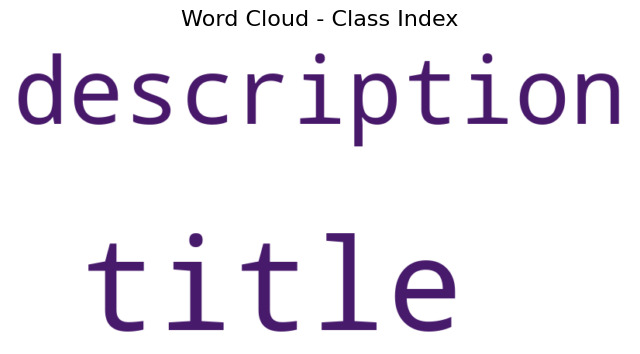

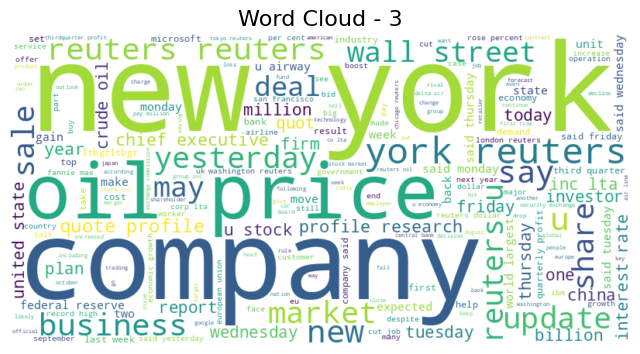

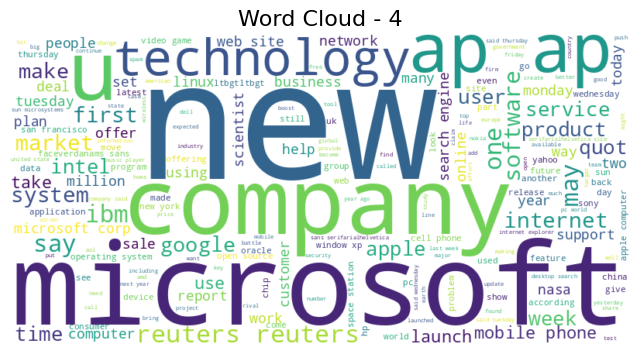

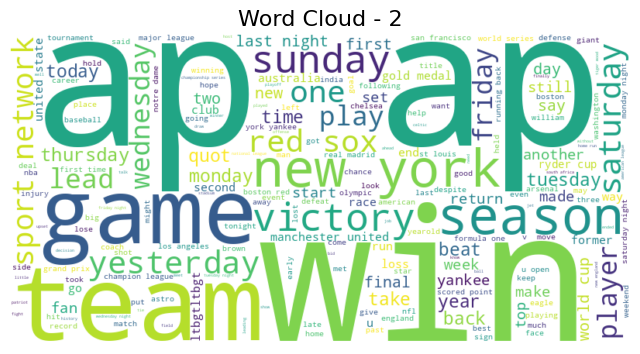

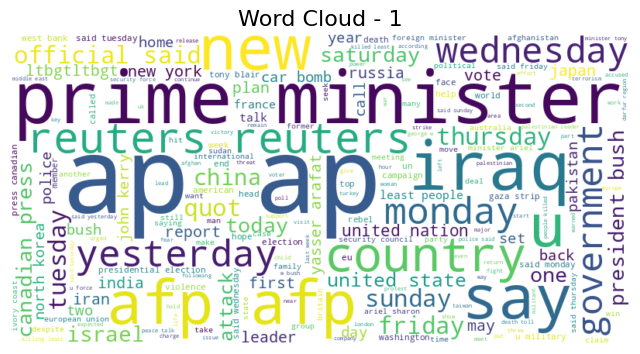

In [ ]:
# ==============================
# AG News Classification + Word Cloud
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# -----------------------------
# 1. Load Dataset
# -----------------------------
# Make sure you have 'train.csv' and 'test.csv' extracted from the AG News dataset
df_train = pd.read_csv("train.csv", header=None)
df_test = pd.read_csv("test.csv", header=None)

# Assign column names
df_train.columns = ["category", "title", "description"]
df_test.columns = ["category", "title", "description"]

# Combine title + description into one text column
df_train["text"] = df_train["title"].astype(str) + " " + df_train["description"].astype(str)
df_test["text"] = df_test["title"].astype(str) + " " + df_test["description"].astype(str)

# Keep only necessary columns
df_train = df_train[["category", "text"]]
df_test = df_test[["category", "text"]]

# -----------------------------
# 2. Preprocessing
# -----------------------------
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation/numbers
    tokens = nltk.word_tokenize(text)  # Tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatize & remove stopwords
    return ' '.join(tokens)

# Apply preprocessing
df_train["clean_text"] = df_train["text"].apply(preprocess)
df_test["clean_text"] = df_test["text"].apply(preprocess)

# -----------------------------
# 3. Vectorization
# -----------------------------
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(df_train["clean_text"])
X_test = vectorizer.transform(df_test["clean_text"])

y_train = df_train["category"]
y_test = df_test["category"]

# -----------------------------
# 4. Model Training
# -----------------------------
model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)

# -----------------------------
# 5. Evaluation
# -----------------------------
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -----------------------------
# 6. BONUS: Word Cloud per Category
# -----------------------------
categories = df_train["category"].unique()
category_names = {1: "World", 2: "Sports", 3: "Business", 4: "Sci/Tech"}  # AG News default mapping

for cat in categories:
    cat_text = " ".join(df_train[df_train["category"] == cat]["clean_text"])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cat_text)

    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - {category_names.get(cat, cat)}", fontsize=16)
    plt.show()
